The Housing and Urban Devolpment is a government orginization that aids those in need to find affordable housing, This dat set is a collection of their listing and related information based on it such as region, price, and rooms. The Region corresponds to each division of the USA into 4 geogrpahic regions. This data comes form the US Housing Devolpment site info on thier affordable housing from the year 2013, in Today's age real estate is still considered one of the safiest investment ideas. 

Download neccessary libraries and define data frame

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/JR/AppData/Thinkful/HADs2013.csv')
%matplotlib inline

In [3]:
print (df.head(10))

          CONTROL  AGE1 METRO3 REGION   LMED   FMR    L30    L50    L80  \
0  '100003130103'    82    '3'    '1'  73738   956  15738  26213  40322   
1  '100006110249'    50    '5'    '3'  55846  1100  17165  28604  45744   
2  '100006370140'    53    '5'    '3'  55846  1100  13750  22897  36614   
3  '100006520140'    67    '5'    '3'  55846   949  13750  22897  36614   
4  '100007130148'    26    '1'    '3'  60991   737  14801  24628  39421   
5  '100007390148'    56    '2'    '3'  62066   657  13170  21924  35073   
6  '100007540148'    50    '1'    '3'  60991   988  16646  27713  44340   
7  '100008700141'    26    '4'    '4'  52322   773  13489  22471  35929   
8  '100008960141'    60    '5'    '4'  50296  1125  13115  21859  34939   
9  '100009170148'    26    '4'    '2'  63221   552  13338  22199  35501   

    IPOV    ...          FMTINCRELFMRCAT  FMTCOST06RELAMICAT  \
0  11067    ...          '1 LTE 50% FMR'    '2 30 - 50% AMI'   
1  24218    ...               '3 GT FMR'    '4

Here is an introductury look at the data that is somewhat messy, lets clean this up by eliminating some none relevant info for this analysis going forward. We will limit the Data to the Region, Number of bedrooms, It's build year, Number of rooms, value, Utility Cost and Other Cost. We also need to remove any negative value in the value column. In context the negative values are properties that are more expensive then their values indicated. Let's also limit the data to make it easier to make conclusions by limiting it to places that have less than 3 bedrooms and after 2000. This makes it more relevant to modern uses, selecting less then 3 because most of those in need using the HUD will not need more than three bedrooms.

In [199]:
cdf = df.ix[:,[3,10,11,14,18, 26, 27]]
cdf = cdf[cdf.VALUE > 0]
cdf = cdf[cdf.BEDRMS < 3]
cdf = cdf[cdf.BUILT > 2000]
print (cdf.head(10))

    REGION  BEDRMS  BUILT   VALUE  ROOMS     UTILITY   OTHERCOST
0      '1'       2   2006   40000      6  169.000000  213.750000
20     '4'       2   2004   60000      6   65.000000   40.000000
21     '4'       2   2003   40000      4  109.000000    8.750000
32     '3'       2   2004  150000      7  148.666667   50.000000
49     '1'       2   2007  850000      4  310.000000   66.666667
64     '2'       2   2003  110000      4  102.500000   89.333333
102    '4'       0   2006  200000      2   54.000000  360.000000
116    '4'       2   2007  330000      4  109.000000  356.250000
117    '4'       2   2007  300000      4  152.000000  122.916667
171    '2'       2   2008  120000      4   82.833333   41.666667


Now that we have a more workable data frame lets start by comparing Bedrooms to value and see if their is a relationship.

In [205]:
cdf.groupby('BEDRMS').mean()

,BUILT,VALUE,ROOMS,UTILITY,OTHERCOST,TOTAL_COST
BEDRMS,,,,,,
0,2007.750000,135000.000000,2.000000,35.750000,120.000000,155.750000
1,2005.275862,211379.327586,3.224138,108.508621,173.860632,282.369253
2,2005.100592,209289.954635,4.932939,159.896285,202.053419,361.949704


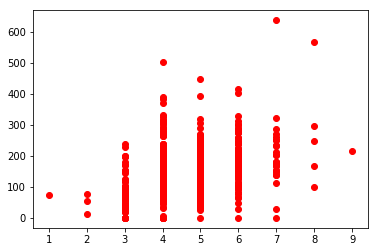

In [204]:
plt.scatter(x = cdf['ROOMS'], y = cdf['UTILITY'], color = 'red')

Unsupringly as the amount of rooms increase the cost of Utilites increases as well, but does other costs factor in as well. The zero bedroom/ Studio are the most recently build so let's examine those a little bit further.  a question for further analysis is does the Year built affect the price of it depending on the region?

In [194]:
cdf.groupby('REGION').count()

,BEDRMS,BUILT,VALUE,ROOMS,UTILITY,OTHERCOST,TOTAL_COST
REGION,,,,,,,
'1',102,102,102,102,102,102,102
'2',160,160,160,160,160,160,160
'3',190,190,190,190,190,190,190
'4',117,117,117,117,117,117,117


Region 3 has the largest amount of construcion done in this time frame. Which is the Southwest region meaning that the southwest had a large amount of Urban devolpment planning from 2000 onwards. A Question for further analysis is to ask if the different regions have different protiorites for building such as region needing more 1 or 2 bedroom houses? Let's look at each region and see if the Utilities cost more per region, let's also combine Other cost with utlities to get total cost.

In [220]:
cdf['TOTAL_COST'] = cdf['UTILITY'] + cdf['OTHERCOST']

With Total cost let's ask one last question about value compared to the total cost and see how they are related.

(array([ 127.,  237.,  144.,   39.,    8.,    1.,    1.,    0.,    9.,    3.]),
 array([    0.        ,   189.33333333,   378.66666666,   567.99999999,
          757.33333332,   946.66666665,  1135.99999998,  1325.33333331,
         1514.66666664,  1703.99999997,  1893.3333333 ]),
 <a list of 10 Patch objects>)

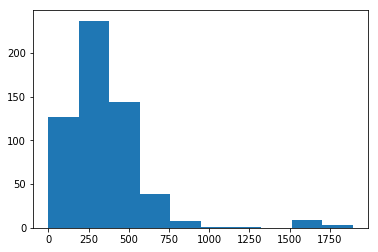

In [219]:
plt.hist(cdf['TOTAL_COST'])

We can see a generalized value for Total cost that shows most fall within a normalized range with a few outliers near the outrageous end. A further question for Analysis is what causes those Outliers.

In [224]:
ETCcdf = cdf[cdf.TOTAL_COST > 1500]
ETCcdf.groupby('REGION').count()

,BEDRMS,BUILT,VALUE,ROOMS,UTILITY,OTHERCOST,TOTAL_COST
REGION,,,,,,,
'1',2,2,2,2,2,2,2
'2',5,5,5,5,5,5,5
'3',3,3,3,3,3,3,3
'4',2,2,2,2,2,2,2


Region Doesn't seem to be affecting the total cost or the total amount of rooms so this could be further investigated to figure out what causes these 12 places to be so expensive.

In Conclusion we Discovered the relationship between the price of Utilites and the number of rooms in a living area, along with the area with the largest growth area and theroized a possible solution, Finally we looked at Total cost extra and the amount of Rooms and discovered a few questions that could be analyzed further. 